# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data)
#data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

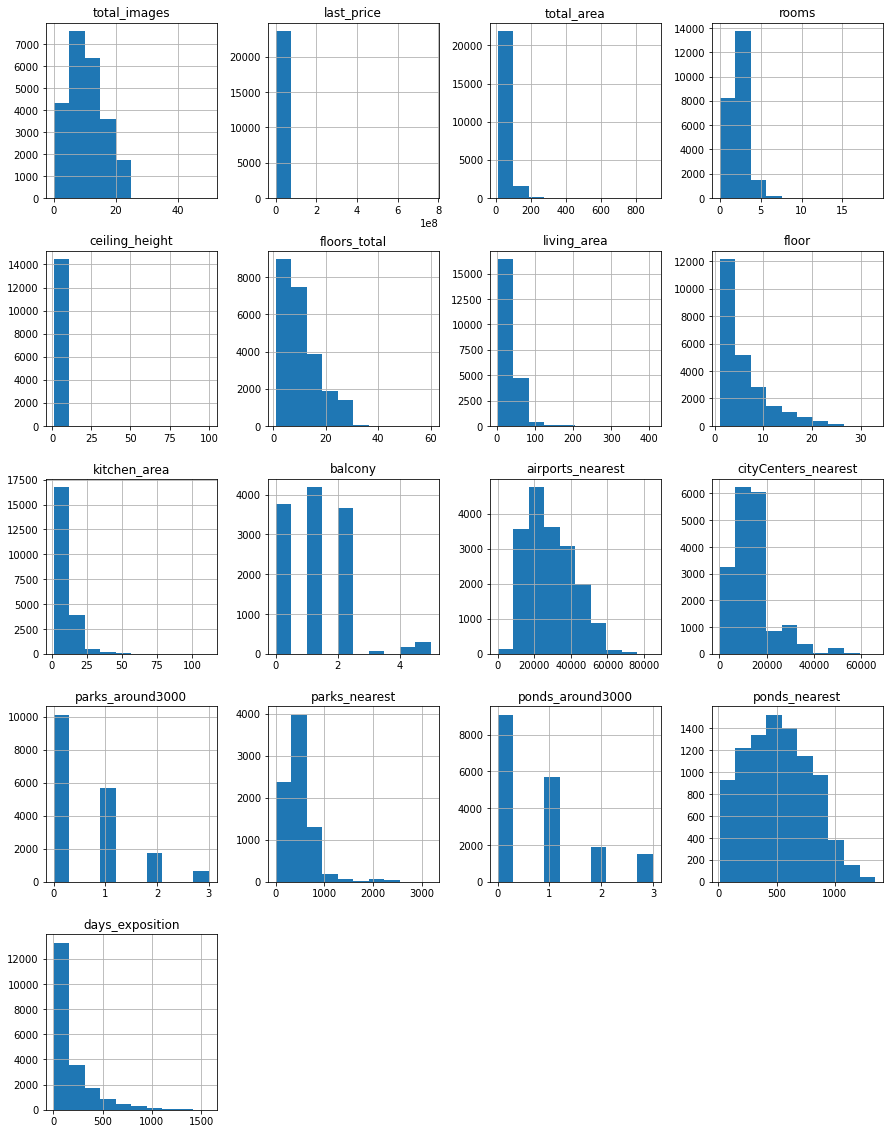

In [4]:
data.hist(figsize=(15, 20));

После изучения общей информации о данных были выявлены следующие проблемы:
1. Пропуски Nan как минимум в столбцах *ceiling_height, is_apartment, balcony, airports_nearest,cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition*.
2. Неоптимальный тип данных в некоторый столбцах, например, is_apartment имеет тип object вместо bool.
3. Неудобное отображение значений столбца first_day_exposition в виде 2019-03-07T00:00:00, в котором все значения имеют одинаковое время.
4. Возможны дубликаты, так как слово "поселок" написано по-разному: через букву "е" и через букву "ё".

Следовательно, далее нужно будет:
1. Провести работу с пропусками (заполнить/удалить/оставить в зависимости от столбца).
2. Изменить типы данных там, где это нужно.
3. Изменить данные и их тип в столбце first_day_exposition, оставить только дату.
4. Провести работу с дубликатами (найти и заменить неявные дубликаты).
5. Исправить/удалить аномальные значения, если они есть.

### Предобработка данных

In [5]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)
data['locality_name'] = data['locality_name'].fillna('Другое')
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

data['living_area_percent_of_total'] = data['living_area'] / data['total_area']
data['living_area'] = data['living_area'].fillna(data['living_area_percent_of_total'].median()*data['total_area'])

data['kitchen_area_percent_of_total'] = data['kitchen_area'] / data['total_area']
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area_percent_of_total'].median()*data['total_area'])

data.isnull().sum()



total_images                         0
last_price                           0
total_area                           0
first_day_exposition                 0
rooms                                0
ceiling_height                       0
floors_total                        86
living_area                          0
floor                                0
is_apartment                         0
studio                               0
open_plan                            0
kitchen_area                         0
balcony                              0
locality_name                        0
airports_nearest                  5542
cityCenters_nearest               5519
parks_around3000                     0
parks_nearest                    15620
ponds_around3000                     0
ponds_nearest                    14589
days_exposition                   3181
living_area_percent_of_total      1903
kitchen_area_percent_of_total     2278
dtype: int64

К пропускам в данных могли привести следующие причины:

1) Отсутствие информации (информацию не собрали; собрали, но не внесли);

2) Неверный ввод информации (например, при отсутсвии балкона поле не заполнялось).

Проанализируем типы данных из общей информации из п.1.

Заменим типы следующих столбцов:

Название столбца     | Предыдущий тип | Новый тип  | Причина
:------------------- | :------------- | :--------- | :------
first_day_exposition | object         | datetime64 | в данном столбце исп-ся только даты
floors_total         | float64        | int64      | в данном столбце исп-ся только целочисл. значения
is_apartment         | object         | bool       | в данном столбце исп-ся только значения True и False
balcony              | float64        | int64      | в данном столбце исп-ся только целочисл. значения
parks_around3000     | float64        | int64      | в данном столбце исп-ся только целочисл. значения
ponds_around3000     | float64        | int64      | в данном столбце исп-ся только целочисл. значения 
days_exposition      | float64        | int64      | в данном столбце исп-ся только целочисл. значения

In [7]:
data = data.astype({
    'floors_total': 'int64',
    'is_apartment': 'bool',
    'balcony': 'int64',                        
    'parks_around3000': 'int64',
    'ponds_around3000': 'int64',
    'days_exposition': 'int64'
}, errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   total_images                   23699 non-null  int64  
 1   last_price                     23699 non-null  float64
 2   total_area                     23699 non-null  float64
 3   first_day_exposition           23699 non-null  object 
 4   rooms                          23699 non-null  int64  
 5   ceiling_height                 23699 non-null  float64
 6   floors_total                   23613 non-null  float64
 7   living_area                    23699 non-null  float64
 8   floor                          23699 non-null  int64  
 9   is_apartment                   23699 non-null  bool   
 10  studio                         23699 non-null  bool   
 11  open_plan                      23699 non-null  bool   
 12  kitchen_area                   23699 non-null 

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_percent_of_total,kitchen_area_percent_of_total
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,90.289724,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,NaN,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.600000,6,False,...,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,40.658769,22,False,...,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,NaN,0.263966
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.430000,26,False,...,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,0.714754,0.106557


In [9]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [10]:
print(data['locality_name'].unique())
localies = ['поселок ', 'посёлок ', 'деревня ', 'городской ', 'садовое товарищество ', 'городского типа ', 'коттеджный ', 'садоводческое некоммерческое товарищество ', 'станции ', 'село ', 'при железнодорожной ']
for i in localies:
    data['locality_name'] = data['locality_name'].str.replace(i, '')

data['locality_name'].sort_values().unique()

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Другое', 'Дружная Горка', 'Дружноселье',
       'Дубровка', 'Елизаветино', 'Ефимовский', 'Жилгородок',
       'Жилпосёлок', 'Житково', 'Заводской', 'Заклинье', 'Заневка',
       'Запорожское', 'Зеленогорск', 'Зимитицы', 'Ивангород'

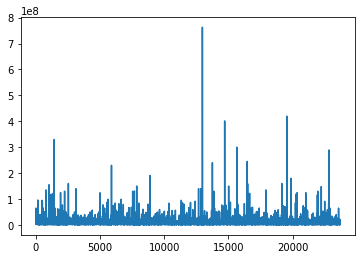

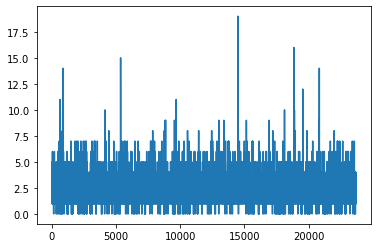

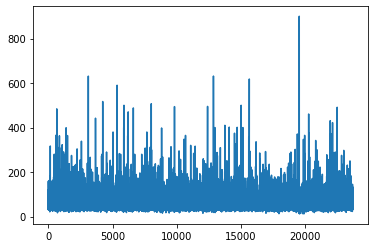

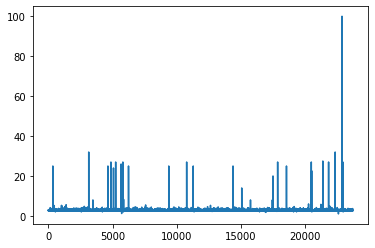

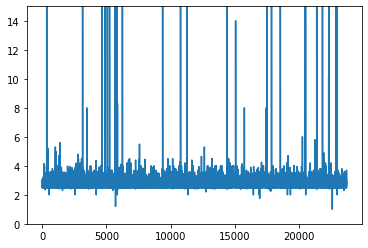

In [11]:
data['last_price'].plot()
plt.show()
data['rooms'].plot()
plt.show()
data['total_area'].plot()
plt.show()
data['ceiling_height'].plot()
plt.show()
data['ceiling_height'].plot()
plt.ylim(0,15)
plt.show()

In [12]:
display(data.query('last_price > 2*1e8')['last_price'])
print(data.query('last_price > 2*1e8').shape[0]/data['last_price'].shape[0]*100, '%')

display(data.query('rooms > 10')['rooms'])
print(data.query('rooms > 10').shape[0]/data['rooms'].shape[0]*100, '%')

display(data.query('total_area > 550')['total_area'])
print(data.query('total_area > 550').shape[0]/data['total_area'].shape[0]*100, '%')

display(data.query('ceiling_height > 10')['ceiling_height'])
print(data.query('ceiling_height > 10').shape[0]/data['ceiling_height'].shape[0]*100, '%')

1436     330000000.0
5893     230000000.0
12971    763000000.0
13749    240000000.0
14706    401300000.0
15651    300000000.0
16461    245000000.0
19540    420000000.0
22831    289238400.0
Name: last_price, dtype: float64

0.037976285919237095 %


648      11
866      14
5358     15
9688     11
14498    19
18848    16
19540    12
20829    14
Name: rooms, dtype: int64

0.03375669859487742 %


3117     631.0
5358     590.0
12859    631.2
15651    618.0
19540    900.0
Name: total_area, dtype: float64

0.021097936621798388 %


355       25.0
3148      32.0
4643      25.0
4876      27.0
5076      24.0
5246      27.0
5669      26.0
5807      27.0
6246      25.0
9379      25.0
10773     27.0
11285     25.0
14382     25.0
15061     14.0
17496     20.0
17857     27.0
18545     25.0
20478     27.0
20507     22.6
21377     27.5
21824     27.0
22309     10.3
22336     32.0
22869    100.0
22938     27.0
Name: ceiling_height, dtype: float64

0.10548968310899194 %


In [13]:
data.loc[data['last_price'] > 2*1e8, 'last_price'] = data['last_price'] / 10
data.loc[data['total_area'] > 550, 'total_area'] = data['total_area'] / 10
data.loc[data['ceiling_height'] > 10.3, 'ceiling_height'] = data['ceiling_height'] / 10
data = data[data['rooms'] <= 10]

По графику видны сильно выделяющиеся значения в столбцах last_price, total_area, ceiling_height, rooms. Назовем их выбросы.

Выбросы выведены отдельно по визуальной отметке на графике, посчитаны процентные соотношения кол-ва выбросов к общему кол-ву значений конкретного столбца. Их оказалось менее 10% во всех случаях.

Для столбцов last_price, total_area, ceiling_height выбросы заменены на такие же значения, деленные на 10 (за исключением значения 10.3 ceiling_height).

Для столбца rooms выбросы удалены.

### Посчитайте и добавьте в таблицу новые столбцы

In [14]:
data['price_per_meter'] = data['last_price'] / data['total_area'] #цена одного квадратного метра
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday #день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['month_exposition'] = data['first_day_exposition'].dt.month #месяц публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year #год публикации объявления

def floor_type(data):
    if data['floor'] == 1:
        return 'первый'
    if data['floor'] == data['floors_total']:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1) #тип этажа квартиры (значения — «первый», «последний», «другой»)
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000 #расстояние до центра города в километрах
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round(0) #округлим до целого
data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_area_percent_of_total,kitchen_area_percent_of_total,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,755.0,NaN,0.472222,0.231481,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,NaN,81.0,0.460396,0.272277,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,574.0,558.0,0.612500,0.148214,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,90.289724,9,False,...,234.0,424.0,NaN,NaN,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,48.0,121.0,0.320000,0.410000,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,NaN,55.0,0.473684,0.299342,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.600000,6,False,...,NaN,155.0,0.284182,0.386059,99195.710456,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,40.658769,22,False,...,NaN,NaN,NaN,0.263966,110544.692737,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.430000,26,False,...,NaN,189.0,0.465320,0.265682,87454.764777,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,NaN,289.0,0.714754,0.106557,88524.590164,6,2,2017,другой,15.0


### Проведите исследовательский анализ данных

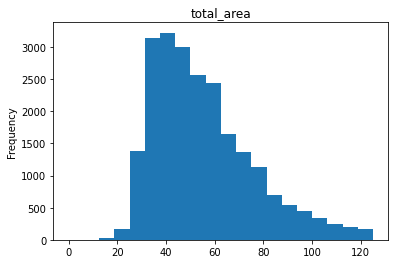

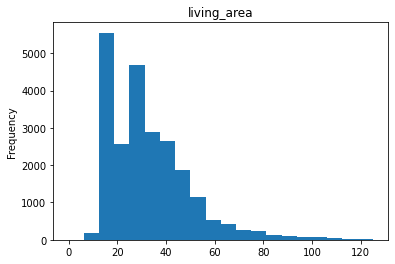

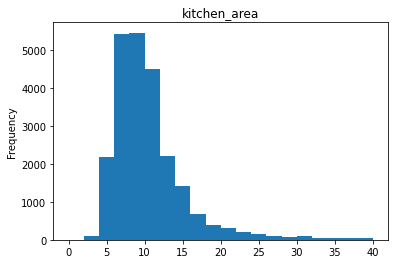

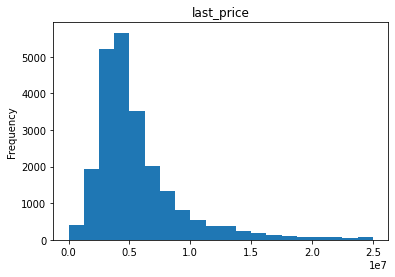

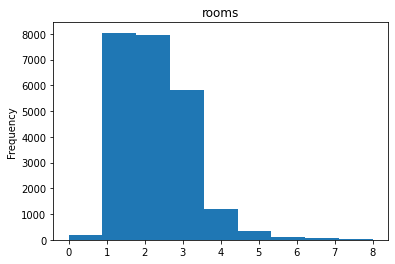

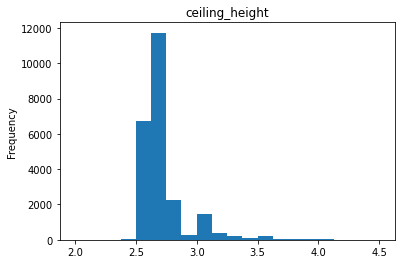

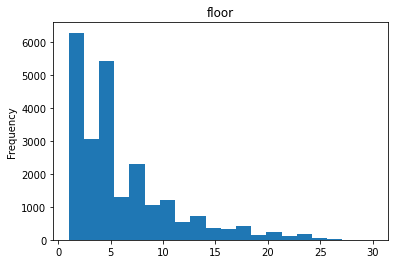

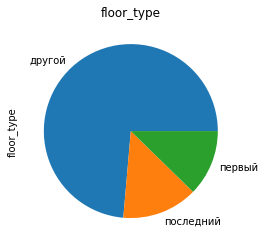

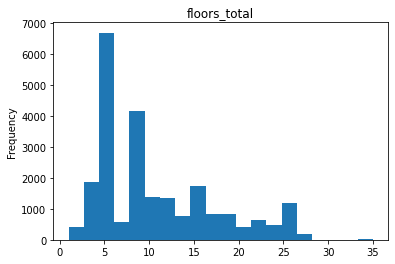

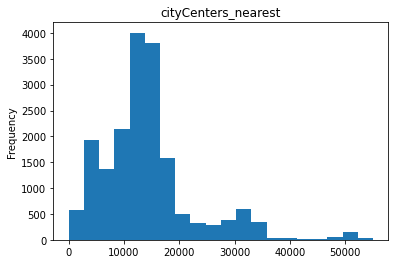

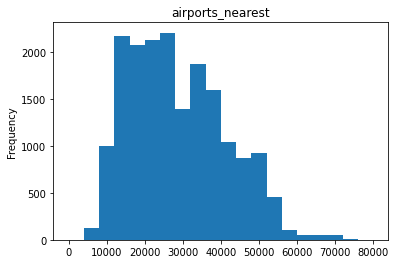

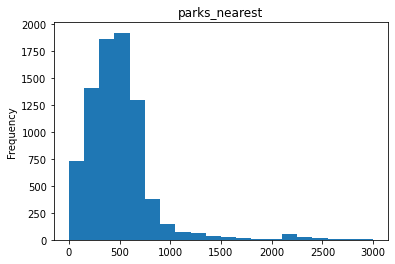

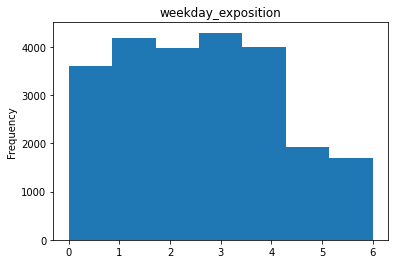

<AxesSubplot:title={'center':'month_exposition'}, ylabel='Frequency'>

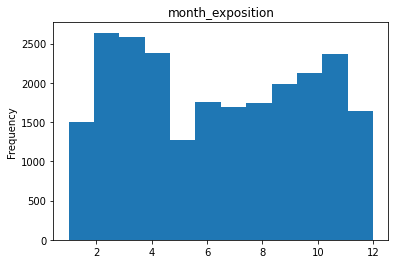

In [15]:
data['total_area'].plot(kind='hist', title='total_area', bins=20, range=(0,125))
plt.show()
data['living_area'].plot(kind='hist', title='living_area', bins=20, range=(0,125))
plt.show()
data['kitchen_area'].plot(kind='hist', title='kitchen_area', bins=20, range=(0,40))
plt.show()
data['last_price'].plot(kind='hist', title='last_price', bins=20, range=(0,2.5*1e7))
plt.show()
data['rooms'].plot(kind='hist', title='rooms', bins=9, range=(0,8))
plt.show()
data['ceiling_height'].plot(kind='hist', title='ceiling_height', bins=20, range=(2,4.5))
plt.show()
data['floor'].plot(kind='hist', title='floor', bins=20, range=(1,30))
plt.show()
data['floor_type'].value_counts().plot(kind='pie', title='floor_type')
plt.show()
data['floors_total'].plot(kind='hist', title='floors_total', bins=20, range=(1,35))
plt.show()
data['cityCenters_nearest'].plot(kind='hist', title='cityCenters_nearest', bins=20, range=(0,55000))
plt.show()
data['airports_nearest'].plot(kind='hist', title='airports_nearest', bins=20, range=(0,80000))
plt.show()
data['parks_nearest'].plot(kind='hist', title='parks_nearest', bins=20, range=(0,3000))
plt.show()
data['weekday_exposition'].plot(kind='hist', title='weekday_exposition', bins=7, range=(0,6))
plt.show()
data['month_exposition'].plot(kind='hist', title='month_exposition', bins=12, range=(1,12))

Столбец                   | Самые часто встречающиеся значения | Диапазон большинства значений
:------------------------ | :--------------------------------- | :----------------------------
Общая площадь             | 30-60 кв.м                         | 25-80 кв.м
Жилая площаль             | 15-30 кв.м                         | 15-50 кв.м
Площадь кухни             | 7-12 кв.м                          | 5-15 кв.м
Цена объекта              | 3-6 млн руб.                       | 2-9 млн. руб.
Кол-во комнат             | 1-2                                | 1-3
Высота потолков           | 2.5-2.7 м                          | 2.5-3.2 м
Этаж                      | 1-5                                | 1-10
Тип этажа                 | не первый, не последний            | не первый, не последний
Общее кол-во этажей       | 5-9                                | 3-26
Расст. до центра города   | 120-180 км                         | 50-200 км
Расст. до ближ. аэропорта | 100-250 км                         | 100-500 км
Расст. до ближ. парка     | 400-500 м                          | 0-600 м
День недели публикации    | будние дни                         | все дни
Месяц публикации          | весенние и осениие месяцы          | все месяцы, кроме января и мая

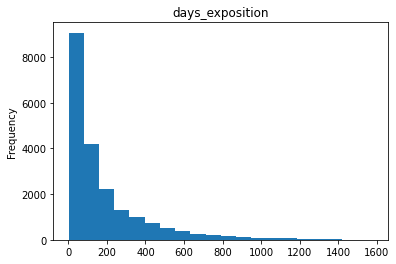

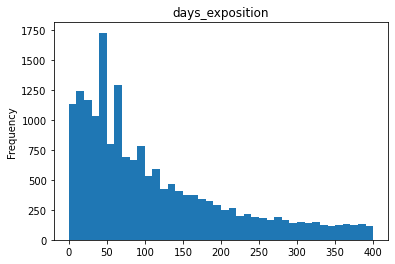

Среднее по days_exposition: 180.8077616888499
Медиана по days_exposition: 95.0


<AxesSubplot:>

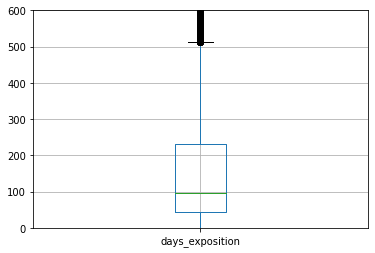

In [16]:
data['days_exposition'].plot(kind='hist', title='days_exposition', bins=20)
plt.show()
data['days_exposition'].plot(kind='hist', title='days_exposition', bins=40, range=(0,400))
plt.show()
print('Среднее по days_exposition:', data['days_exposition'].mean())
print('Медиана по days_exposition:', data['days_exposition'].median())
plt.ylim(0, 600)
data.boxplot(column=['days_exposition'])

Продажа квартиры обычно занимает 50-220 дней с момента размещения объявления.
Среднее составило 182 дня, медиана - 97 дней, мода - 50 дней.

Быстрыми можно назвать продажи, которые заняли менее 50 дней (первый квартиль, только 25% продаж были быстрее), 

долгими - более 220 (третий квартиль, только 25% продаж были медленее), 

необычайно долгими - более 510 дней (третий квартиль + межквартильный размах*1.5).

           median      count
       last_price last_price
rooms                       
0       2700000.0        197
1       3600000.0       8047
2       4770169.0       7940
3       6200000.0       5814
4       9000000.0       1180
5      14000000.0        326
6      19000000.0        105
7      24900000.0         59
8      23095000.0         12
9      23750000.0          8
10     23000000.0          3
               median      count
           last_price last_price
floor_type                      
другой      4850000.0      17441
первый      3900000.0       2917
последний   4300000.0       3333
                       median      count
                   last_price last_price
weekday_exposition                      
0                   4650000.0       3611
1                   4725000.0       4182
2                   4700000.0       3973
3                   4650000.0       4293
4                   4585000.0       4000
5                   4550000.0       1934
6                   4550000

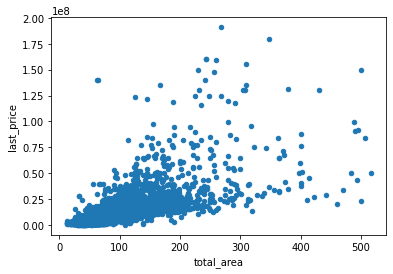

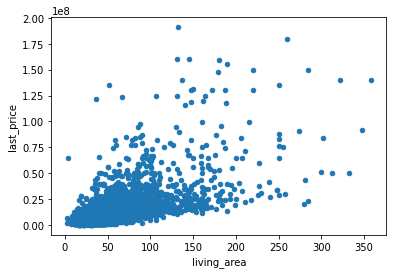

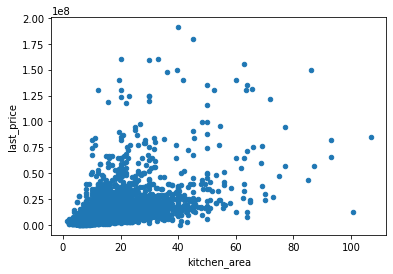

In [17]:
data.plot(x='total_area', y='last_price', kind='scatter')

data.plot(x='living_area', y='last_price', kind='scatter')

data.plot(x='kitchen_area', y='last_price', kind='scatter')

print(pd.pivot_table(data, index='rooms', values='last_price', aggfunc=['median', 'count']))

print(pd.pivot_table(data, index='floor_type', values='last_price', aggfunc=['median', 'count']))

print(pd.pivot_table(data, index='weekday_exposition', values='last_price', aggfunc=['median', 'count']))
print(pd.pivot_table(data, index='month_exposition', values='last_price', aggfunc=['median', 'count']))
print(pd.pivot_table(data, index='year_exposition', values='last_price', aggfunc=['median', 'count']))

for i in ['total_area', 'living_area', 'kitchen_area', 'rooms']:
    print(f'Correlation between last_price and {i}:', data['last_price'].corr(data[i]).round(2))

Цена квартиры зависит от общей площади, жилой площади, площади кухни (указано в порядке уменьшения корреляции, т.е. от общей площади зависит больше, от площади кухни - меньше).

Зависимость цены от | Коэфф. корреляции
:------------------ | :----------------
общей площади       | 0.65
жилой площади       | 0.59
площади кухни       | 0.51

С увеличением количества комнат цена квартиры растет (коэфф. корреляции 0.36).

По этажу самыми дорогими оказались квартиры, распологающиеся не на первом и не на последнем этаже. Самыми дешевыми - квартиры на первом этаже.

Цена квартиры не зависит от дня недели, в который было выставлено объявление о продаже.

Месяцем, в котором выставленные на продажу квартиры имели наименьшую цену, оказался июнь (медианная цена ~4,8 млн). Самый "дорогой" месяц - апрель (медианная цена ~4,5 млн). В остальные месяцы разница в цене не существенна и колеблется в пределах 4,6-4,7 млн.

Объявлений 2014 года в данных слишком мало (на порядок меньше, чем в остальные годы), чтобы их учитывать. По годам 2015-2019 заметно снижение цен к 2017 году (с 5,4 млн до 4,6 млн) и последующее повышение (до 5,1 млн).

In [18]:
data.groupby('locality_name')['price_per_meter'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15713,114620.590188
Мурино,590,86087.512050
Кудрово,472,95324.930544
Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
Парголово,327,90175.913458
Гатчина,307,68746.146763


Населенными пунктами с самым большим количеством объявлений по продаже квартир оказались Санкт-Петербург, Мурино, Кудрово, Шушары, Всеволожск, Пушкин, Колпино, Парголово, Гатчина, Выборг.

Среди указанных населенных пунктов самая большая цена за квадратный метр оказалась у Санкт-Петербурга (~115 тыс.),

самая маленькая - у Выборга (~58 тыс.)

cityCenters_nearest_km
0.0     3.144912e+07
1.0     1.822710e+07
2.0     1.658430e+07
3.0     1.110832e+07
4.0     1.225349e+07
5.0     1.369009e+07
6.0     1.498162e+07
7.0     1.477515e+07
8.0     9.243289e+06
9.0     6.950659e+06
10.0    6.504119e+06
11.0    6.250815e+06
12.0    5.828545e+06
13.0    6.083141e+06
14.0    5.629101e+06
15.0    5.884751e+06
16.0    5.373131e+06
17.0    5.292395e+06
18.0    5.091331e+06
19.0    5.037675e+06
20.0    5.951465e+06
21.0    5.493469e+06
22.0    5.415524e+06
23.0    4.985376e+06
24.0    3.854430e+06
25.0    4.052840e+06
26.0    3.973013e+06
27.0    8.300000e+06
28.0    5.026429e+06
29.0    4.236667e+06
Name: last_price, dtype: float64


<AxesSubplot:xlabel='cityCenters_nearest_km'>

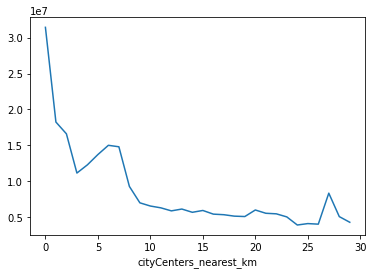

In [19]:
print(data.query("locality_name == 'Санкт-Петербург'").groupby('cityCenters_nearest_km')['last_price'].mean())
data.query("locality_name == 'Санкт-Петербург'").groupby('cityCenters_nearest_km')['last_price'].mean().plot()

Зависимость цены квартиры в Санкт-Петербурге в зависимости от удаленности от центра:

Расстояние до центра | Тип изменения  | Промежуток
:------------------- | :------------- | :---------
0-3 км               | резкий спад    | 30-11 млн руб.
3-6 км               | рост           | 11-15 млн руб.
6-10 км              | резкий спад    | 15-7 млн руб.
10-30 км             | медленный спад | 7-5 млн руб.

### Общий вывод

#### Предобработка данных

1. Были определены столбцы, содержащие пропуски, а именно: *ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition*.


2. Для заполнения пропусков были добавлены столбцы:

*living_area_percent_of_total* - отношение living_area к total_area

*kitchen_area_percent_of_total* - отношение kitchen_area к total_area

3. Пропуски были заполнены в следующих столбцах следующим образом:

Столбец          | Чем заполнены пропуски
:--------------- | :---------------------
ceiling_height   | медиана
is_apartment     | False
balcony          | 0
locality_name    | "Другое"
parks_around3000 | 0
ponds_around3000 | 0
living_area      | медиана living_area_percent_of_total * total_area
kitchen_area     | медиана kitchen_area_percent_of_total * total_area

4. Заменены типы данных следующих столбцов:

Название столбца     | Предыдущий тип | Новый тип  
:------------------- | :------------- | :--------- 
first_day_exposition | object         | datetime64 
floors_total         | float64        | int64      
is_apartment         | object         | bool  
balcony              | float64        | int64       
parks_around3000     | float64        | int64      
ponds_around3000     | float64        | int64      
days_exposition      | float64        | int64      

5. Заменены неявные дублиткаты в столбце *locality_name* путем удаления вспомогательных слов, таких как поселок, деревня, село и т.д.


6. Заменены или удалены аномальные значения:

Столбец        | Какие значения | Действие
:------------- | :------------- | :------------
ceiling_height | больше 10.3    | деление на 10
total_area     | больше 550     | деление на 10
last_price     | больше 200 млн | деление на 10
rooms          | больше 10      | удаление


#### Добавление новых столбцов

Добавлены следующие столбцы:

Название столбца       | Описание
:--------------------- | :-------
price_per_meter        | цена одного квадратного метра
weekday_exposition     | день недели публикации объявления (0 — понедельник, 1 — вторник и т.д.)
month_exposition       | месяц публикации объявления (номер)
year_exposition        | год публикации объявления
floor_typecity         | тип этажа (первый, последний, другой)
cityCenters_nearest_km | расстояние до центра города в км, округленное до целого

#### Исследовательский анализ данных

1. Построены гистограммы по следующим столбцам: *total_area, living_area, kitchen_area, last_price, rooms, ceiling_height, floor, floor_type, floors_total, cityCenters_nearest, airports_nearest, parks_nearest, weekday_exposition, month_exposition*, после анализа которых была получены следующая информация:

Столбец                   | Самые часто встречающиеся значения | Диапазон большинства значений
:------------------------ | :--------------------------------- | :----------------------------
Общая площадь             | 30-60 кв.м                         | 25-80 кв.м
Жилая площаль             | 15-30 кв.м                         | 15-50 кв.м
Площадь кухни             | 7-12 кв.м                          | 5-15 кв.м
Цена объекта              | 3-6 млн руб.                       | 2-9 млн. руб.
Кол-во комнат             | 1-2                                | 1-3
Высота потолков           | 2.5-2.7 м                          | 2.5-3.2 м
Этаж                      | 1-5                                | 1-10
Тип этажа                 | не первый, не последний            | не первый, не последний
Общее кол-во этажей       | 5-9                                | 3-26
Расст. до центра города   | 120-180 км                         | 50-200 км
Расст. до ближ. аэропорта | 100-250 км                         | 100-500 км
Расст. до ближ. парка     | 400-500 м                          | 0-600 м
День недели публикации    | будние дни                         | все дни
Месяц публикации          | весенние и осениие месяцы          | все месяцы, кроме января и мая

2. Анализ days_exposition (сколько дней висит объявление)

Показатель           | Значение
:------------------- | :----------
Среднее              | 182 дня
Медиана              | 97 дней
Мода                 | 50 дней
Средний диапазон     | 50-220 дней
Быстрые продажи      | <50 дней
Долгие продажи       | >220 дней
Очень долгие продажи | >510 дней

3. Исследованы зависимости цены квартиры от *общей площади, жилой площади, площади кухни, количества комнат, этажа, дня недели, месяца, года выставления объявления о продаже*.

Чем больше коэфф. корреляции, тем больше зависимость.

Зависимость цены от | Коэфф. корреляции | Расшифровка
:------------------ | :---------------- | :----------
общей площади       | 0.65              | с увел-ем цена растет
жилой площади       | 0.59              | с увел-ем цена растет
площади кухни       | 0.51              | с увел-ем цена растет
кол-ва комнат       | 0.36              | с увел-ем цена растет

Что         | Самые большие цены | Самые маленькие цены
:---------- | :----------------- | :-------------------
День недели | нет                | нет  
Месяц       | апрель             | июнь
Год         | 2015, 2019         | 2017

4. Анализ объявлений и цен в различных населенных пунктах

В таблице ниже указаны 10 населенных пунктов с наибольшим количеством объявлений о продаже квартир. Для каждого из этих населенных пунктов обозначена средняя цена за квадратный метр. Также выделены населенные пункты с наибольшей и наименьшей цена за квадратный метр:

наибольшая цена - Санкт-Петербург (~115 тыс.руб.)

наименьшая цена - Выборг (~58 тыс.руб.)

Населенный пункт | Кол-во объявлений | Средняя цена за $$м^2$$
:--------------- | :---------------- | :--------------------
Санкт-Петербург	 | 15494	         | <span style="color:blue">114674.6</span>
Мурино	         | 523	             | 84855.4
Кудрово	         | 432	             | 94755.2
Шушары	         | 430	             | 78024.3
Всеволожск	     | 391	             | 68693.8
Пушкин	         | 366	             | 103188.2
Колпино	         | 337	             | 75331.4
Парголово	     | 324	             | 90270.7
Гатчина		     | 302	             | 68846.4
Выборг		     | 232	             | <span style="color:red">57963.2</span>

5. Анализ зависимости цен в Санкт-Петербурге от расстояния до центра города

Расстояние до центра | Тип изменения  | Промежуток
:------------------- | :------------- | :---------
0-3 км               | резкий спад    | 30-11 млн руб.
3-6 км               | рост           | 11-15 млн руб.
6-10 км              | резкий спад    | 15-7 млн руб.
10-30 км             | медленный спад | 7-5 млн руб.